## <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales MSE2019 18PDS

# Trabajo Práctico 1
#### Pablo Slavkin

***
## Recepción de una señal degradada


<div class="alert alert-block alert-info">
<b>1)</b> a) Filtrar la señal con un filtro digital para eliminar potencia de ruido. Pueden probar
con filtros FIR o IIR, los que les parezcan convenientes.
¿Es óptimo el filtro elegido para detectar la información en forma confiable?

</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se levantan las seniales y se analizan sus espectros:</div>
 

In [1]:
import  numpy   as np                                                                          
from    plotter import *                                                                       
from    dft     import *                                                                       
from    filter  import *                                                                       
from    dft     import *                                                                       
                                                                                               
fs    = 20                      #frecuencia de sampleo de la senial                            
pl    = plotter_class ( 2,2 )   #objeto para generar un grafico de 2x2                         
dft_c = dft_class     ( )       #objeto para analisis de espectro                              
f     = filter_class  ( )       #objero para funciones de filtrado                             
                                                                                               
signal = np.load('signalLowSNR.npy')        #lee la senial a decodidicar                       
#signal = np.load('signal.npy')                                                                
signal=signal[:2560*2]                      #tomo una pocrion para debug, luego comentar          
pl.plot_signal  ( 1 ,pl.spaceX(signal) ,signal ,'signal' ,'time' ,'volt' ,trace='-' )          
                                                                                               
pulse  = np.load('pulse.npy')               #cargo el pulso original para plotearlo            
pl.plot_signal  ( 2 ,pl.spaceX(pulse)  ,pulse  ,'pulse'  ,'time' ,'volt' ,trace='-' )          
                                                                                               
fft ,freq  = dft_c.abs ( fs ,signal.size  ,signal); #tomo la dft de la senial para verla          
pl.stem_signal ( 3 ,freq[1:] ,fft[1:] ,'dft signal' ,'frecuencia' ,'Pnormal.') #notar que saco la continua para que no apague el resto de la senial                 
                                                                                               
fft ,freq  = dft_c.abs ( fs ,pulse.size  ,pulse);   #tomo la dft del pulso para verlo          
pl.stem_signal ( 4 ,freq     ,fft     ,'dft pulse'  ,'frecuencia' ,'Pnormal.')                     
                                                                       
pl.plot_show()   

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 1000x700 with 4 Axes>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se puede ver que tanto el espectro del pulso como el espectro de la senial tienen potencia distribuida en todo el espectro, con lo cual cualquiera sea el filtro que se elija para limitar la potencia de ruido que se aprecia en el espectro de signal, recortara un poco de la energia de la senial de interes. 
    Igualmente aun asi, se lograra aumentar un poco la SNR. Como se ve en el siguiente filtrado:    
</div>

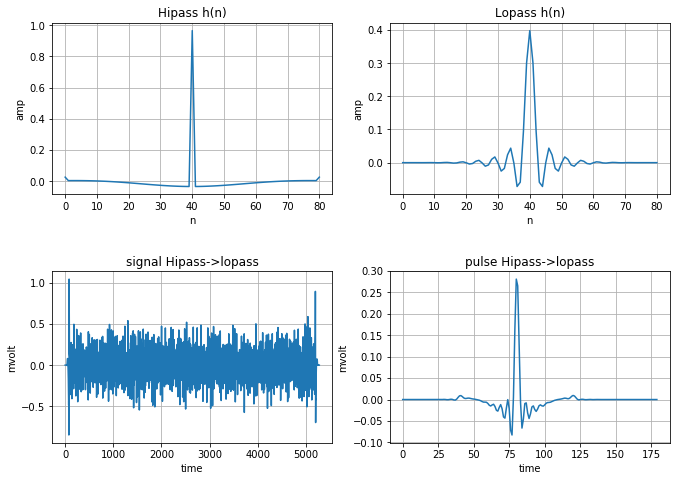

In [2]:
pl    = plotter_class ( 2,2 )       #nuevo grafico                                             
                                                                                               
hipass = np.load("hipass_fir.npz")['ba'][0]     #leo los parametros del pasabajo              
lopass = np.load("lopass_fir.npz")['ba'][0]     # y pasaaltos diseniados                       
pl.plot_signal ( 1 ,pl.spaceX(hipass ) ,hipass ,'Hipass h(n)' ,'n' ,'amp' ,trace='-' )         
pl.plot_signal ( 2 ,pl.spaceX(lopass ) ,lopass ,'Lopass h(n)' ,'n' ,'amp' ,trace='-' )         
                                                                                               
signal = f.fir ( signal ,hipass )               #aplico el filtrado a la senial y la muestro   
signal = f.fir ( signal ,lopass )                                                              
pl.plot_signal ( 3 ,pl.spaceX(signal ),signal ,'signal Hipass->lopass' ,'time' ,'mvolt' ,trace='-' )
                                                                                               
ans = f.fir ( pulse ,hipass )                   #aplico el filtrado al pulso para verificar que no este
ans = f.fir ( ans   ,lopass )                   #recortando demasiado                          
pl.plot_signal ( 4 ,pl.spaceX(ans    ),ans    ,'pulse Hipass->lopass'  ,'time' ,'mvolt' ,trace='-' )

pl.plot_show() 


<div class="alert alert-block alert-info">
A continuacino genero los siguientes filtros FIR, un pasaaltos para eliminar la continua y alguna muy baja frecuencia que puedas estar presente y luego un pasabajos para elimniar lo que se pueda de ruido sin deteriorar demasiado la senial. 
    Claramete el filtro no seria optimo ya que esta perdiendo bastante informacion importante de la senial
</div>

tecnica umbral=
[172 172 172 172 172 172 172 188 172 172 172 172 172 172 172 172  68  66
 235 252 232  62 213 128 111  93  82 255 231 250 214 166  64]
tecnica correlacion=
[172 172 172 172 172 172 172 188 172 172 172 172 172 173 172 172  68  74
 235 252 232  62 213 128 111  93  82 255 231 250 214 166  64]


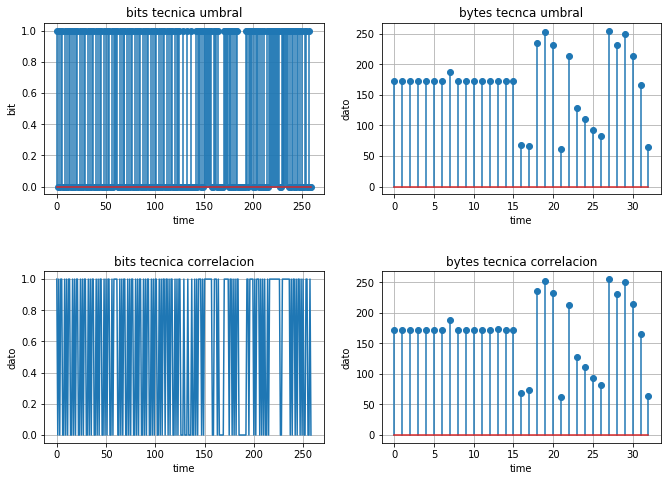

In [3]:
groupDelay  = hipass.size//2+lopass.size//2     #calculo el retado basado en el largo de la respuesta al impulso de cada filtro
signal      = signal[groupDelay+1:]             #demoro la senial original dicaha cantirdad,lo previo es descartado, notar el +!
#esto es lo importante, aca lo que hago es quedarme solo con el primer pulso de cada 20, que es el
#sample que tiene la mayor energia y es el que usare para comparar contra un umbral para decidir si
#el pulso es 1 o -1                                                                            
pl    = plotter_class ( 2,2 )                                                                  
                                                                                               
ans         = signal[::pulse.size]                                                             
ans[ans>=0] = 1                                 #digitalizo la senial con un comparador        
ans[ans<0]  = 0                                                                                
ans         = np.uint8(ans)                     #lo necesito apra empaquetar luego a bytes     
pl.stem_signal  ( 1 ,pl.spaceX(ans) ,ans ,'bits tecnica umbral'  ,'time' ,'bit'  ,trace='.' )  
                                                                                               
ans = np.packbits(ans)                          #empaqueto de 8 por comodidad                  
pl.stem_signal  ( 2 ,pl.spaceX(ans) ,ans ,'bytes tecnca umbral' ,'time' ,'dato' ,trace='.' )   
                                                                                               
print(f"tecnica umbral=\n{ans}")                                      #muestra los resultados    
                                                                                               
ans=np.zeros(0)                                                                                
for i in range(signal.size//pulse.size):                                                       
    ans=np.append(ans,np.correlate(signal[i*pulse.size:(i+1)*pulse.size],pulse))               
                                                                                               
ans[ans>=0] = 1                                                                                
ans[ans<0]  = 0                                                                                
pl.plot_signal  ( 3 ,pl.spaceX(ans),ans ,'bits tecnica correlacion' , 'time' ,'dato'  ,trace='-' )
ans = np.uint8(ans)                                                                            
ans = np.packbits(ans)                                                                         
pl.stem_signal  ( 4 ,pl.spaceX(ans),ans ,'bytes tecnica correlacion' , 'time' ,'dato'  ,trace='.' )
print(f"tecnica correlacion=\n{ans}")                                      #muestra los resultados
                                                                                               
pl.plot_show()                                                                                          